In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readnet(exp_name, nthreads=8):
    dump_filename = '../demyelination/data/' + exp_name + '/other/net_'

    df = pd.DataFrame()

    for threadid in range(nthreads):
        with open(dump_filename + str(threadid), "rb") as f:
            network = pickle.load(f)

            net = network['synapse_ex']
            #print(net.shape)

            df = pd.concat([df, net])
    return df

In [114]:
df_plast = readnet('plasticity-debugging-noautapses')

In [113]:
df_plast_highupdate = readnet('plasticity-debugging-noautapses-hiupdate')

In [42]:
df_plast_hundredupdate = readnet('plasticity-debugging-noautapses-hundredupdate')

In [47]:
df_hardwired = readnet('destexhe-scaleup-saveconn', 1)

In [75]:
63863/max_epsilon

0.01596575

In [94]:
num_ea1_neurons = 2000
max_epsilon = num_ea1_neurons*num_ea1_neurons

df_plast.shape[0]/max_epsilon, df_hardwired.shape[0]/max_epsilon

(0.0263185, 0.01596575)

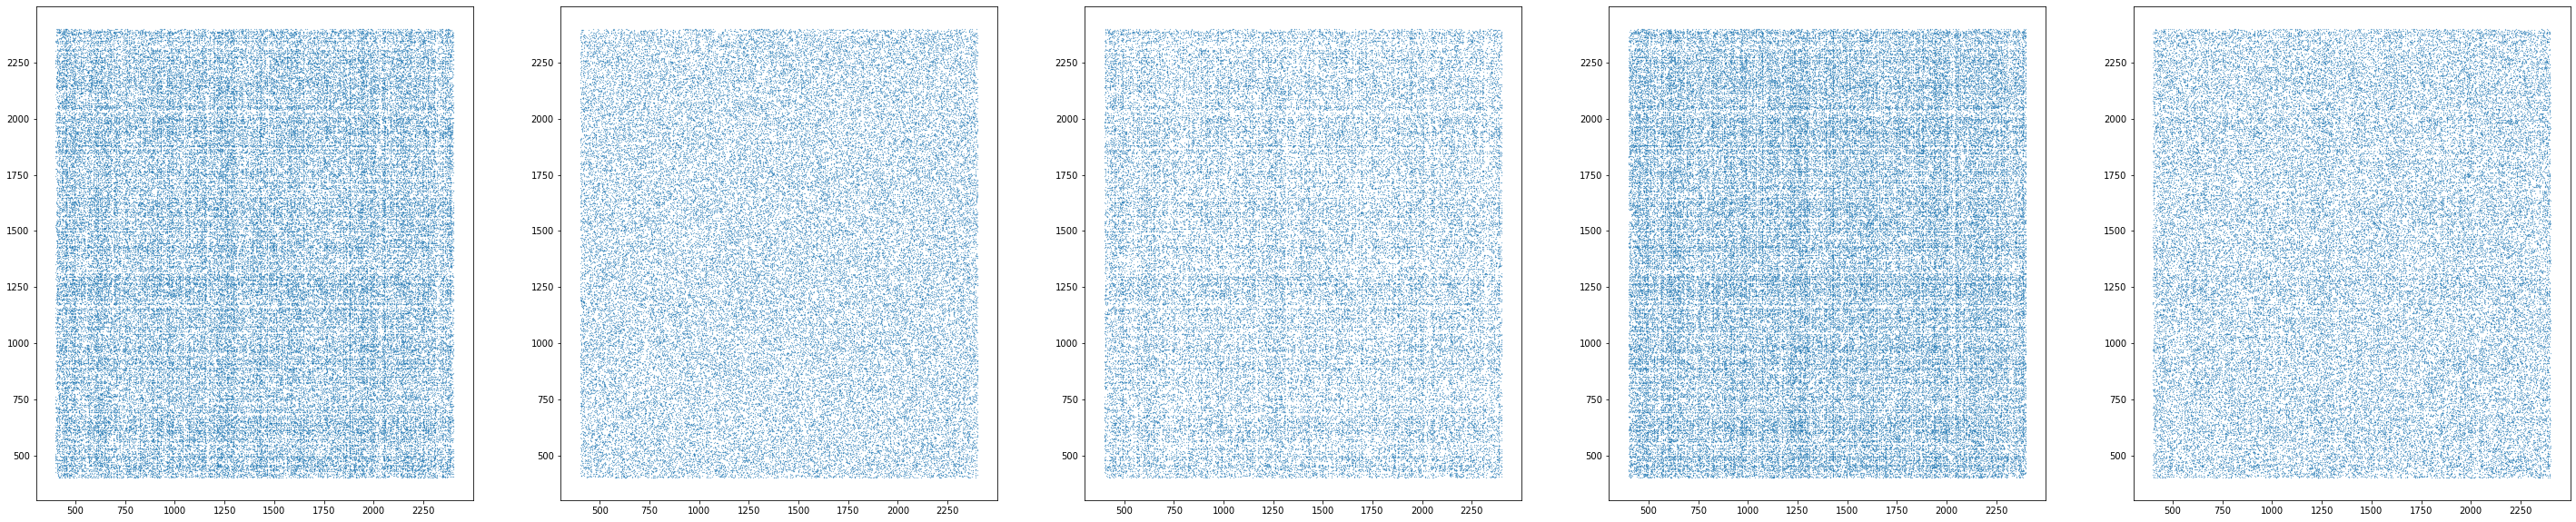

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(50, 10)

ax[0].scatter(df_plast.source, df_plast.target, s=.05)

ax[1].scatter(df_hardwired.source, df_hardwired.target, s=.05)

df_plast_smaller = df_plast.sample(64000)
ax[2].scatter(df_plast_smaller.source, df_plast_smaller.target, s=.05)

ax[3].scatter(df_plast_hundredupdate.source, df_plast_hundredupdate.target, s=.05)

ax[4].scatter(df_saveatonepsix.source, df_saveatonepsix.target, s=.05)


In [49]:
df_saveatonepsix = readnet("plasticity-debugging-noautapses-saveatonepsix-disableplast", 1)

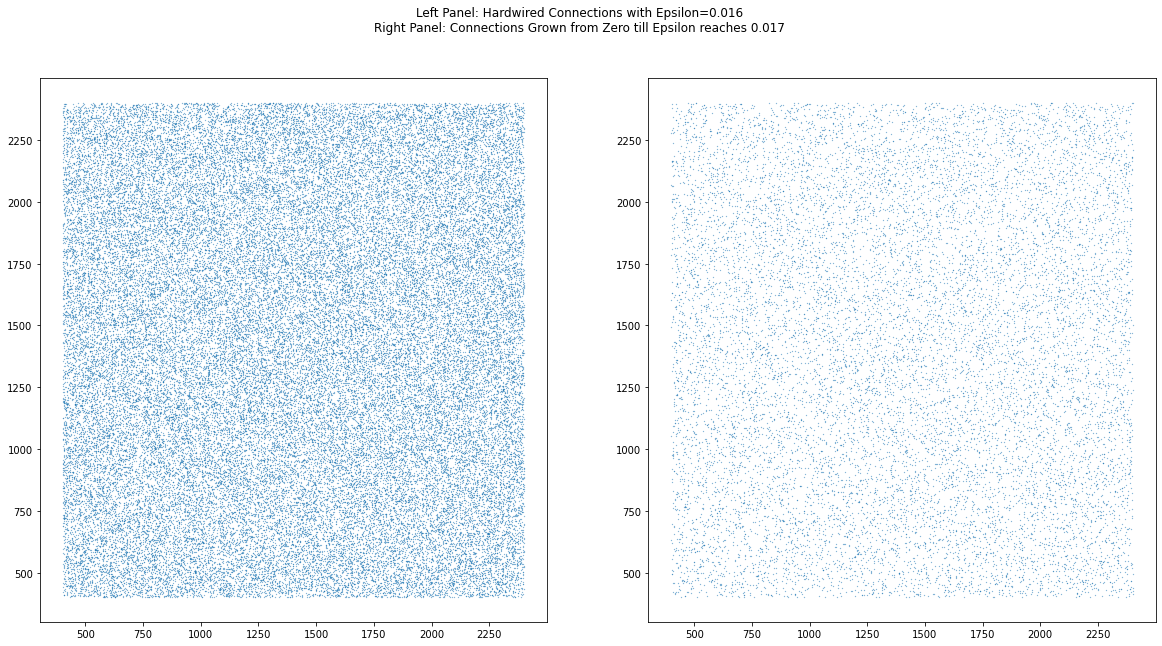

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 10)

ax[0].scatter(df_hardwired.source, df_hardwired.target, s=.05)

ax[1].scatter(df_saveatonepsix.source, df_saveatonepsix.target, s=.05)

plt.suptitle("Left Panel: Hardwired Connections with Epsilon=0.016\nRight Panel: Connections Grown from Zero till Epsilon reaches 0.017");

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/grown-hardwired-comparison.pdf")

In [40]:
from numpy import cov

cov(df_hardwired.source, df_hardwired.target)[0][1], cov(df_saveatonepsix.source, df_saveatonepsix.target)[0][1]

(310.03863700802503, -3986.096864137099)

In [41]:
df_saveatonepsix.shape, df_hardwired.shape

((14711, 4), (63863, 10))

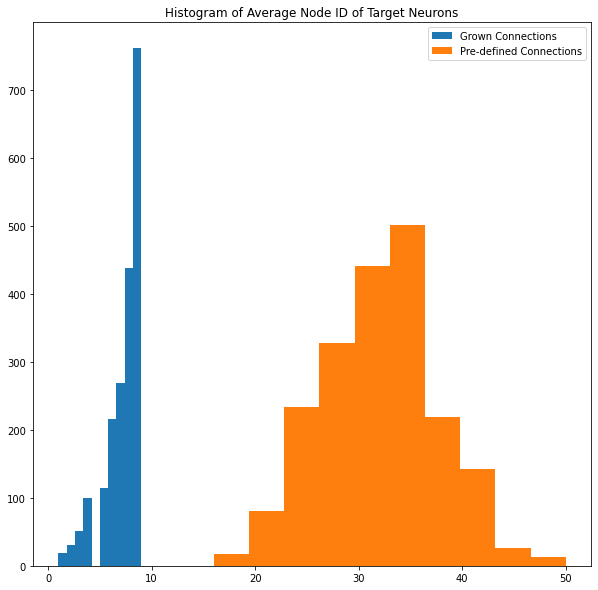

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 10)

ax.hist(df_saveatonepsix.target.value_counts(), label="Grown Connections");
ax.hist(df_hardwired.target.value_counts(), label="Pre-defined Connections");

plt.title("Histogram of Average Node ID of Target Neurons")

ax.legend();

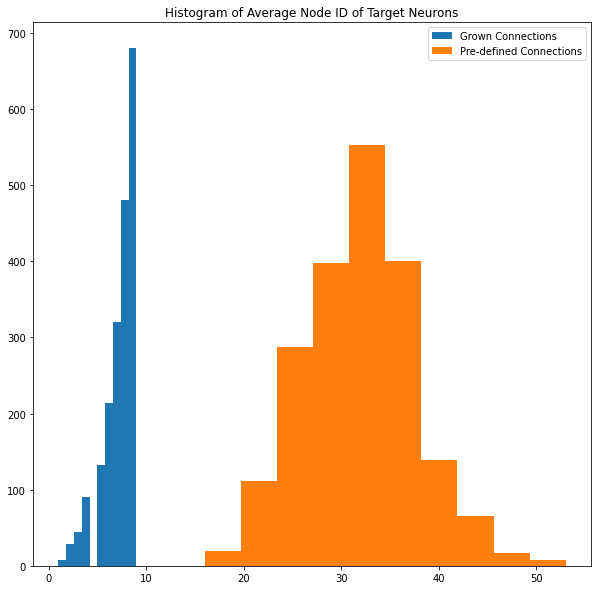

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 10)

ax.hist(df_saveatonepsix.source.value_counts(), label="Grown Connections");
ax.hist(df_hardwired.source.value_counts(), label="Pre-defined Connections");

plt.title("Histogram of Average Node ID of Target Neurons")

ax.legend();

In [141]:
from scipy.stats import chisquare

chisquare( df_saveatonepsix[["source", "target"]] )

Power_divergenceResult(statistic=array([16072211.0363889, 16072211.0363889]), pvalue=array([0., 0.]))

Text(0.5, 0.98, 'Left Panel: Hardwired Connections with Epsilon=0.016\nRight Panel: Connections Grown from Zero till Epsilon reaches 0.011')

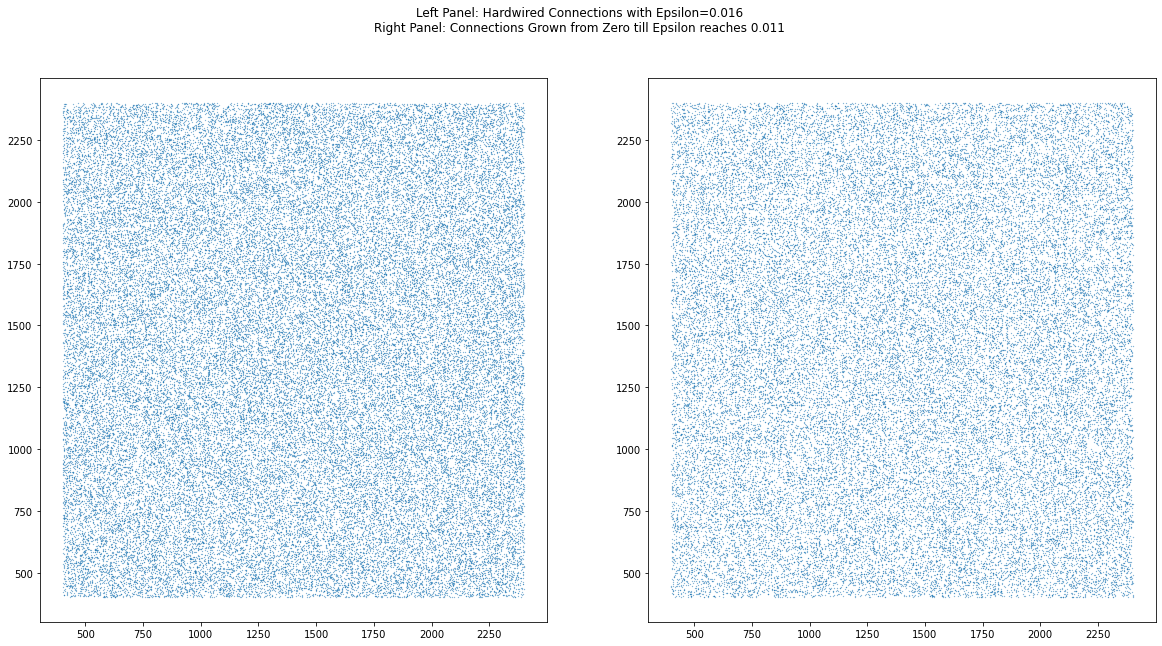

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 10)

ax[0].scatter(df_hardwired.source, df_hardwired.target, s=.05)

df_saveatonepsix_subsamp = df_saveatonepsix.sample(48000)
ax[1].scatter(df_saveatonepsix_subsamp.source, df_saveatonepsix_subsamp.target, s=.05)

plt.suptitle("Left Panel: Hardwired Connections with Epsilon=0.016\nRight Panel: Connections Grown from Zero till Epsilon reaches 0.011")

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/grown-hardwired-comparison.pdf")

In [84]:
.016 * max_epsilon

64000.0

In [90]:
.026/.016

1.625

In [132]:
44000/max_epsilon

0.011

In [97]:
64000/max_epsilon

0.016

(array([312., 460., 429., 360., 213., 118.,  67.,  21.,  12.,   6.]),
 array([  1. ,  20.1,  39.2,  58.3,  77.4,  96.5, 115.6, 134.7, 153.8,
        172.9, 192. ]),
 <BarContainer object of 10 artists>)

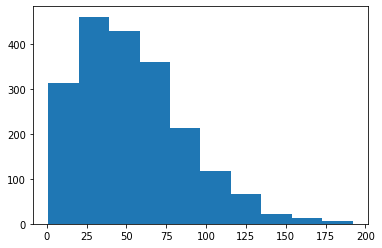

In [72]:
indeg = df_plast_hundredupdate.target.value_counts()
plt.hist(indeg)

(array([ 17.,  80., 233., 328., 441., 501., 219., 142.,  26.,  13.]),
 array([16. , 19.4, 22.8, 26.2, 29.6, 33. , 36.4, 39.8, 43.2, 46.6, 50. ]),
 <BarContainer object of 10 artists>)

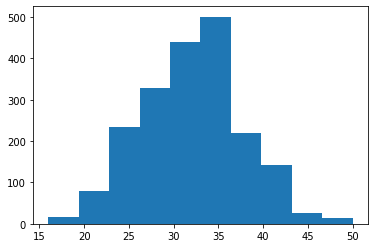

In [76]:
indeg = df_hardwired.target.value_counts()
plt.hist(indeg)